# Exercise 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## a)

Die Likelihood-Funktion L und die negative log-likelihood-Funktion lauten:

$L(\lambda) = \Pi_i \frac{\lambda^{x_i}}{x_i!}e^{-\lambda}$

$l(\lambda) = -\text{ln}(L) = -\Sigma_i (x_i \text{ln}(\lambda) - \text{ln}(x_i!) - \lambda)$

$\Rightarrow l(\lambda) = 3\lambda - (13+8+9) \text{ln}(\lambda) + \text{ln}(13! \cdot 8! \cdot 9!)$

In [2]:
#def poisson(x, y): # Poisson-Verteilung (y := lambda)
#   return y**x/np.math.factorial(x)*np.exp(-y)

def l(y):  # negative log-likelihood function (y := lambda)
    return 3*y -(13+8+9)*np.log(y) + np.log(np.math.factorial(13)) + np.log(np.math.factorial(8)) + np.log(np.math.factorial(9))
    #np.log(np.math.factorial(13)*np.math.factorial(8)*np.math.factorial(9))

Minimum: ( 10 , 6.881041446128762 )


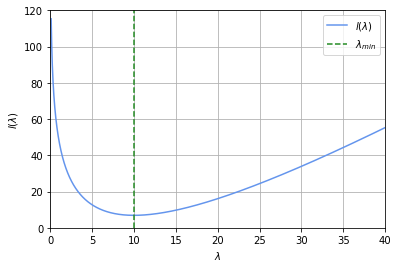

In [3]:
fig, ax = plt.subplots(1,1)

x = np.linspace(0.1, 40, 10000)
y = l(x)


ax.plot(x, y, label = "$l(\lambda)$", color = "cornflowerblue")
plt.vlines(10, 0, 120, ls = "dashed", color = "forestgreen", label = "$\lambda_{min}$")

ax.set_xlabel("$\lambda$")
ax.set_ylabel("$l(\lambda)$")
ax.set_xlim(0, 40)
ax.set_ylim(0, 120)

ax.legend()
plt.grid()

print("Minimum: (", 10, ",", l(10),")")

### b)

Minimum analytisch:

$\frac{\text{d}l(\lambda)}{\text{d}\lambda} \stackrel{!}{=} 0$

$\Rightarrow 3 - \frac{13+8+9}{\lambda} = 0$

$\Leftrightarrow \lambda = 10$

## c)

In [4]:
sigma1 = x[np.isclose(y, l(10)+0.5, rtol = 0.0001)] # estimating intersection between log-likelihood fucntion and l_min + 1/2

sigma2 = x[np.isclose(y, l(10)+2, rtol = 0.0002)]

sigma3 = x[np.isclose(y, l(10)+9/2, rtol = 0.0003)]

print(sigma1)
print(sigma2)
print(sigma3)

[ 8.28430843 11.93951395]
[ 6.77992799 14.11029103]
[ 5.47506751 16.52049205]


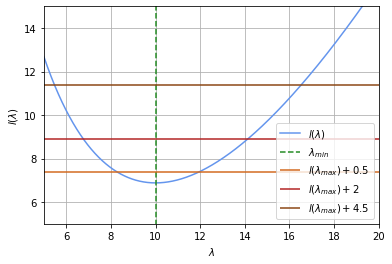

In [5]:
plt.close()
fig1, ax1 = fig, ax

ax1.hlines(l(10)+0.5, 0, 40, color = "chocolate", label = "$l(\lambda_{max}) + 0.5$")
ax1.hlines(l(10)+2, 0, 40, color = "firebrick", label = "$l(\lambda_{max}) + 2$")
ax1.hlines(l(10)+9/2, 0, 40, color = "saddlebrown", label = "$l(\lambda_{max}) + 4.5$")
ax1.set_ylim(5, 15)
ax1.set_xlim(5, 20)

ax1.legend()
fig1

Die genannten Intervalle beschreiben die 1, 2 und 3- $\sigma$-Umgebungen des Schätzwertes für $\lambda$.

## d)

Entwickeln der negativen log-likelihood-Funktion um das Minimum:

$\frac{\text{d}l(\lambda)}{\text{d}\lambda} = 3 - \frac{30}{\lambda}$

$\Rightarrow l'(10) = 0$

$\frac{\text{d}^2 l(\lambda)}{\text{d}\lambda^2} = \frac{30}{\lambda^2}$

$\Rightarrow l''(10) = \frac{3}{10}$

In [6]:
l(10)

6.881041446128762

$l(\lambda_\text{min} = 10) \approx 6.88$

$\Rightarrow T(\lambda | \lambda_\text{min}) \approx 6.88 + \frac{3}{20}(\lambda - 10)^2 + \mathcal{O}(\lambda^3)$

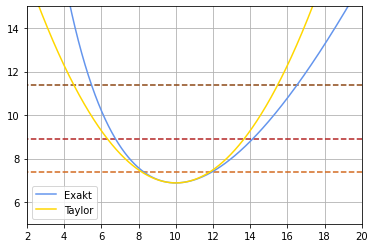

In [7]:
def T(x):
    return l(10) + 3/20*(x-10)**2

y2 = T(x)

fig2, ax2 = plt.subplots(1,1)

ax2.hlines(l(10)+0.5, 0, 40, color = "chocolate", ls = "dashed")
ax2.hlines(l(10)+2, 0, 40, color = "firebrick", ls = "dashed")
ax2.hlines(l(10)+9/2, 0, 40, color = "saddlebrown", ls = "dashed")

ax2.plot(x, y, label = "Exakt", color = "cornflowerblue")
ax2.plot(x, y2, label = "Taylor", color = "gold")

ax2.set_ylim(5, 15)
ax2.set_xlim(2, 20)

plt.legend()
plt.grid()

$T(\lambda) = l(10) + \frac{3}{20}(\lambda -10)^2 \stackrel{!}{=} c + l(10)$

$\Leftrightarrow \lambda = \pm \sqrt{\frac{20}{3}c}+10$

In [8]:
def f(x):
    return -np.sqrt(20/3*x) + 10, np.sqrt(20/3*x) + 10 

In [9]:
s1 = f(0.5)
s2 = f(2)
s3 = f(4.5)

print("Taylor: \t\t\t\t\t", "Numerisch:")
print(s1, sigma1)
print(s2, sigma2)
print(s3, sigma3)

Taylor: 					 Numerisch:
(8.174258141649446, 11.825741858350554) [ 8.28430843 11.93951395]
(6.348516283298892, 13.651483716701108) [ 6.77992799 14.11029103]
(4.522774424948339, 15.477225575051662) [ 5.47506751 16.52049205]


Für die 1-$\sigma$ Umgebung ist die Taylorreihe eine gute Näherung, spätestens ab der 3-$\sigma$ Umgebung weichen die Werte relativ stark ab.